### Dataset

In [2]:
# Matplotlib forms basis for visualization in Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [3]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

In [4]:
df.to_csv('telecom_churn.csv')

In [4]:
# o churn é a variável destino (o target)
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### Caracteristicas numéticas

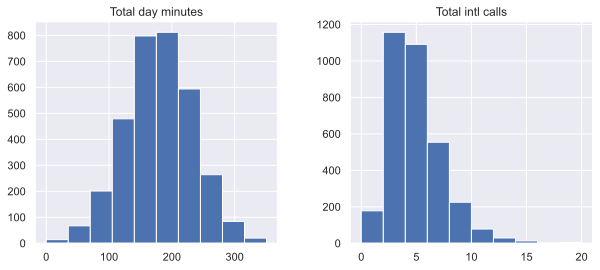

In [14]:
# variaveis numericos
# carateristicas quantitativas  - númericos ordenados - pode ser discreto, inteiros, cotúninuos ou reais
# a forma fácil de observar a distribuição de uma variável númerico é traçar seu histograma

features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

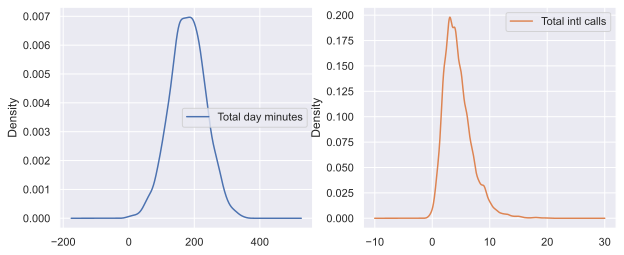

In [21]:
# Gráfico de densidade Kernel, forma mais tranquilo de entender como os dados tão distribuidos 
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

/var/folders/vq/2hrn0h_n07g09ltbxxy7p30jfw_32m/T/ipykernel_61701/3525245587.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total intl calls']);


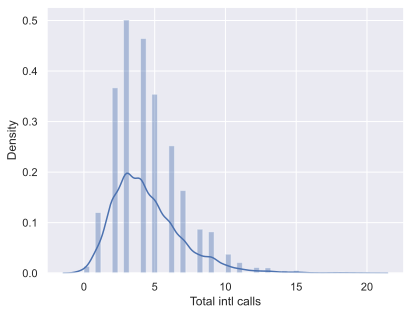

In [22]:
# é possível com seaborn
sns.distplot(df['Total intl calls']);

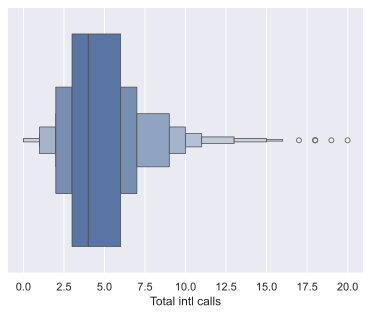

In [24]:
# outra forma é com o diagrama de caixa
sns.boxenplot(x="Total intl calls", data=df);

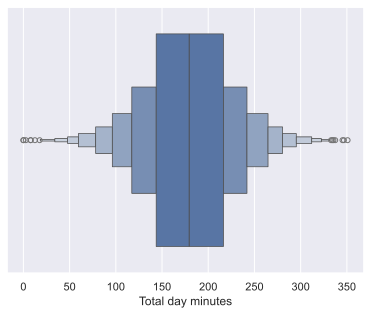

In [25]:
sns.boxenplot(x="Total day minutes", data=df);

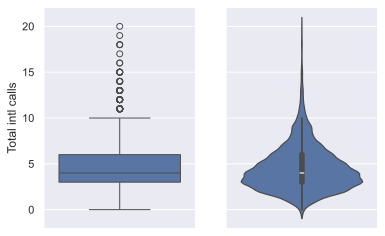

In [26]:
# grafico de violino
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

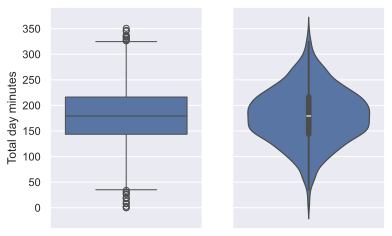

In [27]:

_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total day minutes"], ax=axes[0])
sns.violinplot(data=df["Total day minutes"], ax=axes[1]);

In [28]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

### Caracteristicas categóricas e binárias

In [30]:
# variaveis categoricas assum um número fixo de valores, que possui uma caracteristica qualitativa
# Tem variaveis binarias, são casos de variaveis categoricas que só possui dois valores possíveis 
# se os valores das variaveis categorica for ordenados, ela é chamada de ordinal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [4]:
# tabela de frequencia
# verifica equilibrio da classe no conj de dados
# No caso está bem desbalanceada

df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='Customer service calls', ylabel='count'>

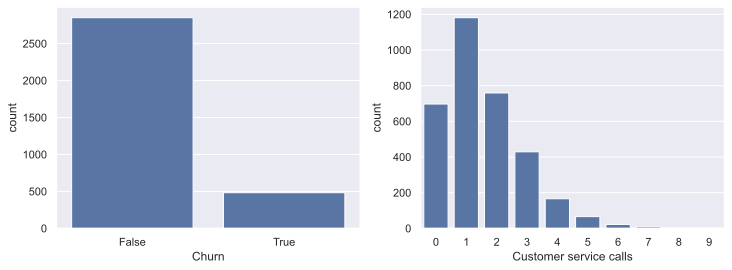

In [5]:
# Quisermos ter uma visualização por gráfico de barras
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1])

In [11]:
# os histograma - são mais adequadas para observar a distribuição de variáveis numéricas
# grafico de barras é interessante para caracteristicas categóricas
# eixo x: Histograma (numerico). Grafico de barras pode ser qlqr coisa (númerico, string, boolean)
# eixo x: Histograma é um eixo de corrdenadas cartesianas ao longo do qual osvalores não podem ser altarados
# No gráfico de barra não é predefinidas
df['Churn_int'] = df['Churn'].astype(int)
df['Churn_int'].value_counts()

Churn_int
0    2850
1     483
Name: count, dtype: int64

In [15]:
df

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  ...  Total eve charge  \
0                45.07              197.4  ...             16.78   
1                27.47              195.5  ...             16.62   
2                41.38              121.2  ...             10.30   
3                50.90               61.9  ...              5.26   
4                28.34              148.3  ...             12.61   
...                ...                ...  ...               ...   
3328             26.55              215.5  ...             18.32   
3329             39.29              153.4  ...             13.04   
3330             30.74              288.8  ...             24.55   
3331             36.35              159.6  ...             13.57   
3332             39.85              265.9  ...             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
333

## Visualização multivariada 

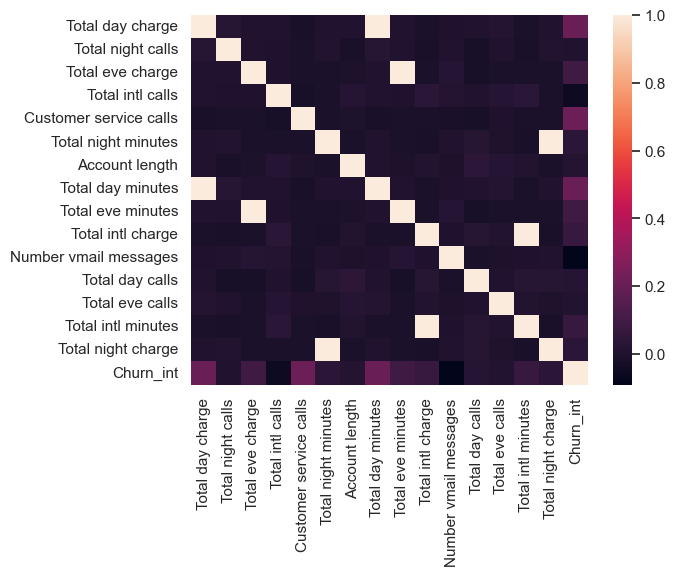

In [31]:
# Permite ver relacionamento de duas variáveis 
# Matriz de correlação
# Entender as correlações entre as variáveis numéricas no conj de dados
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

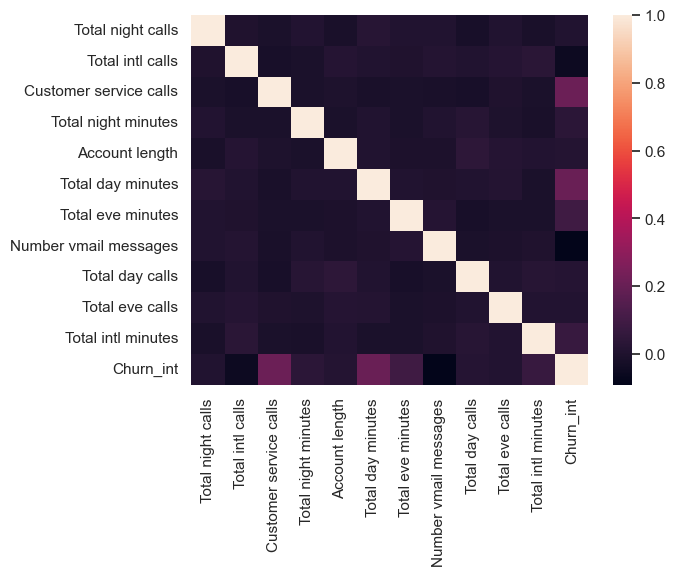

In [34]:
# No gráfico foi nítido entender que tem 4 variáveis que possui os mesmos valores
# São chamadas de variaveis dependentes. Podemos deixar de fora, pois não contribuem com nenhuma informação adicional
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

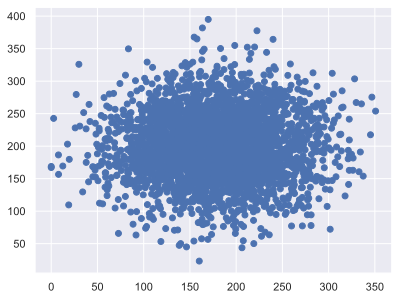

In [18]:
# Diaframa de dispersão 
# dispersão de valores de duas variaveis númericas como coordenadas cartesianas em 2D (podendo ser 3D)
plt.scatter(df['Total day minutes'], df['Total night minutes'])

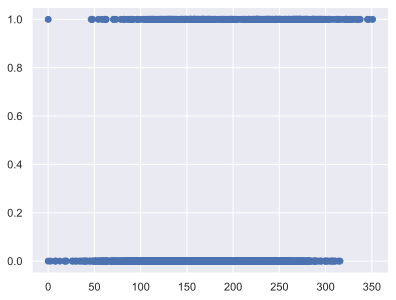

In [19]:
plt.scatter(df['Total day minutes'], df['Churn_int'])

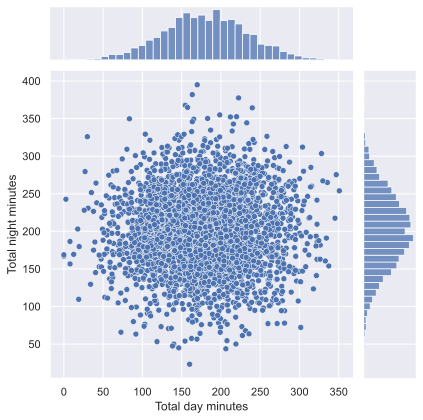

In [20]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

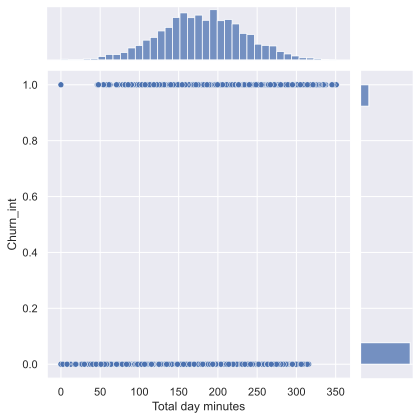

In [21]:
sns.jointplot(x="Total day minutes", y="Churn_int", data=df, kind="scatter");

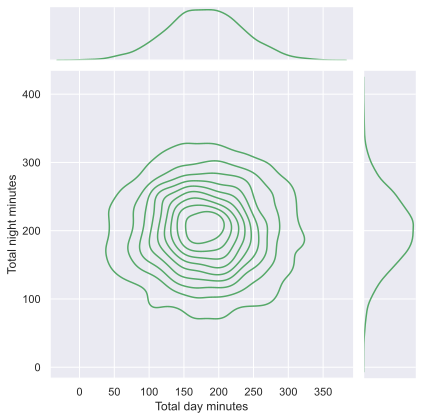

In [23]:
# A função jointplot()plota dois histogramas que podem ser úteis em alguns casos.

# Usando a mesma função, também podemos obter uma versão suavizada da nossa distribuição bivariada:
sns.jointplot(
    x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g"
);

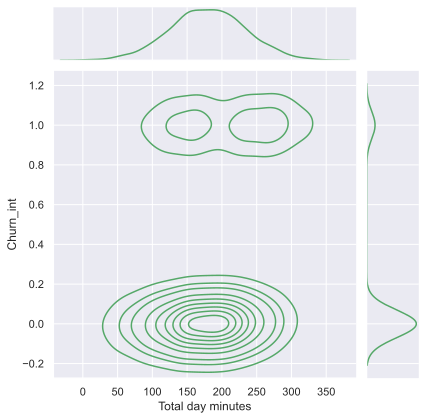

In [24]:
sns.jointplot(
    x="Total day minutes", y="Churn_int", data=df, kind="kde", color="g"
);

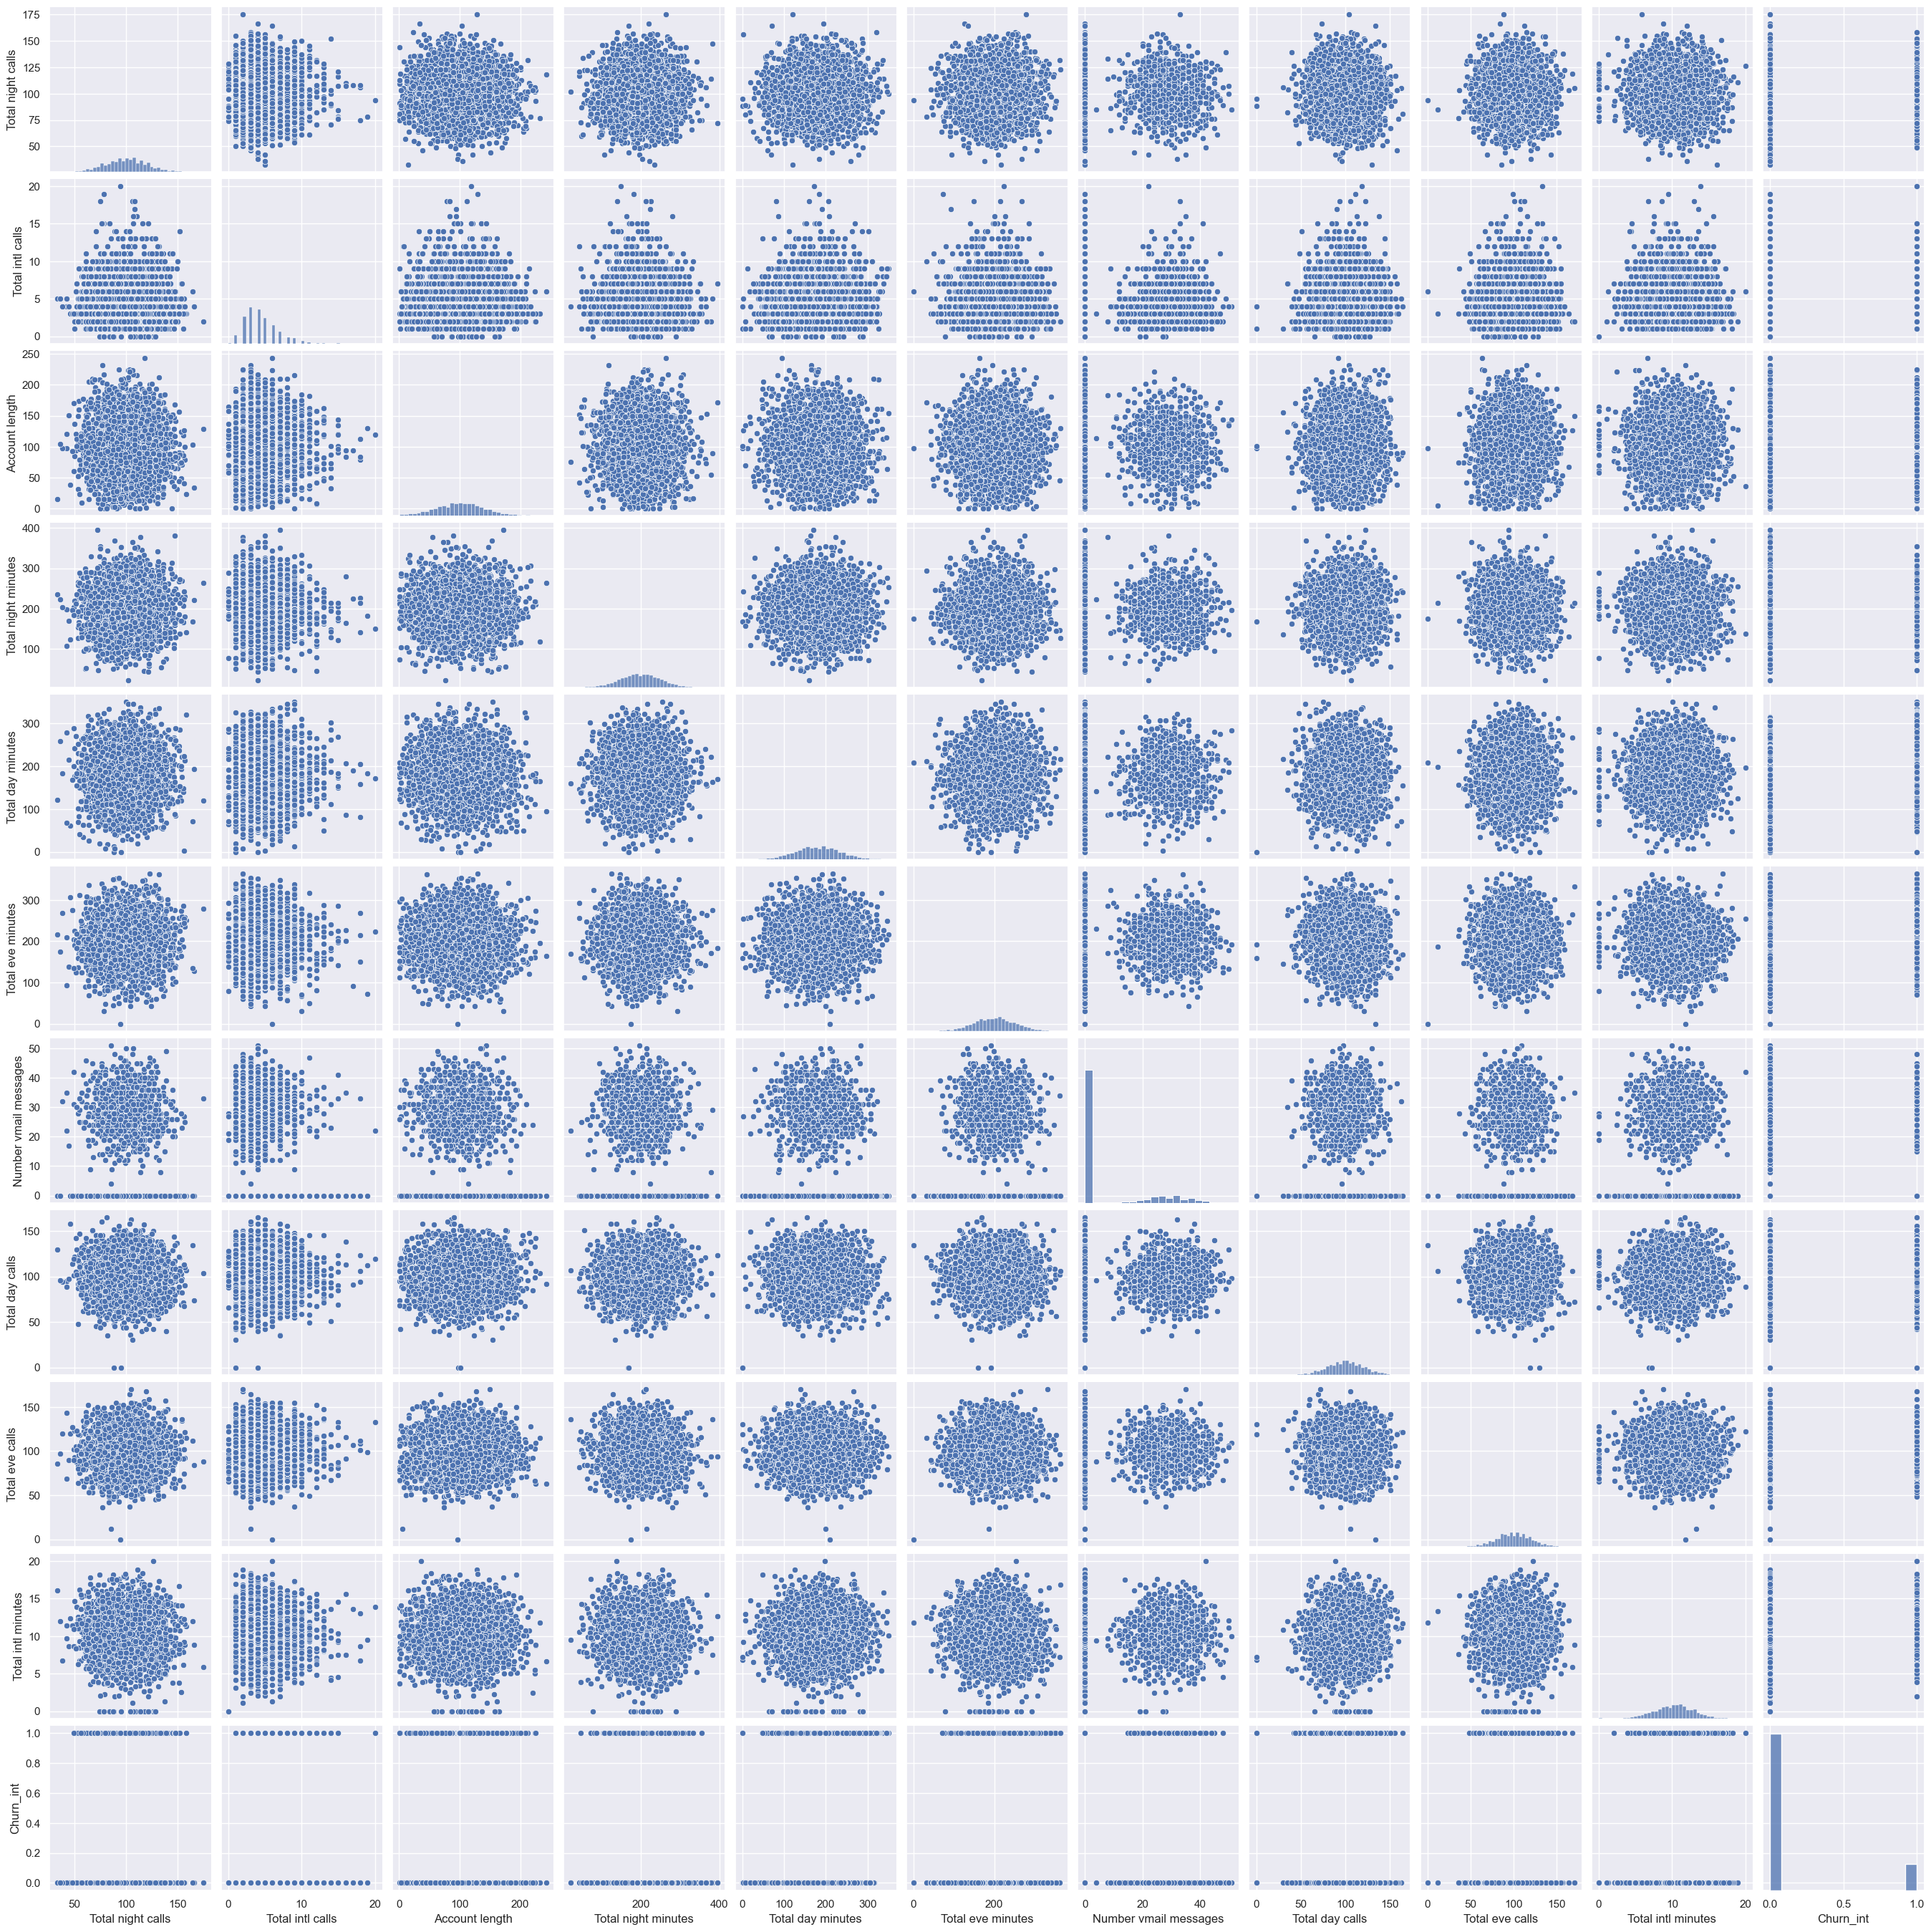

In [25]:
# Matriz de dispersão
# matriz scatterplot, sua diagonal contém as distribuições das variaveis correspondentes
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

## Quantitativo X Categórico

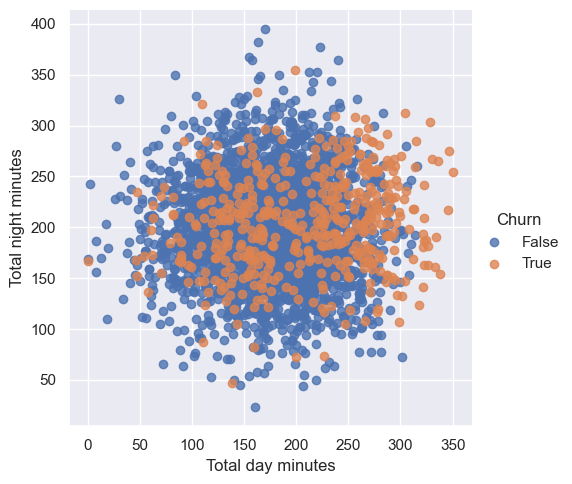

In [28]:
# vamos tetar obter mais insights para previsão rotatividade a partir das interações entre os revursos numéricos e categoricos
# vamos tentar entender mais como as variaveis se relaciona (entrada e destino 
# Hue - define o parametro categorico
sns.lmplot(
    x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False
);

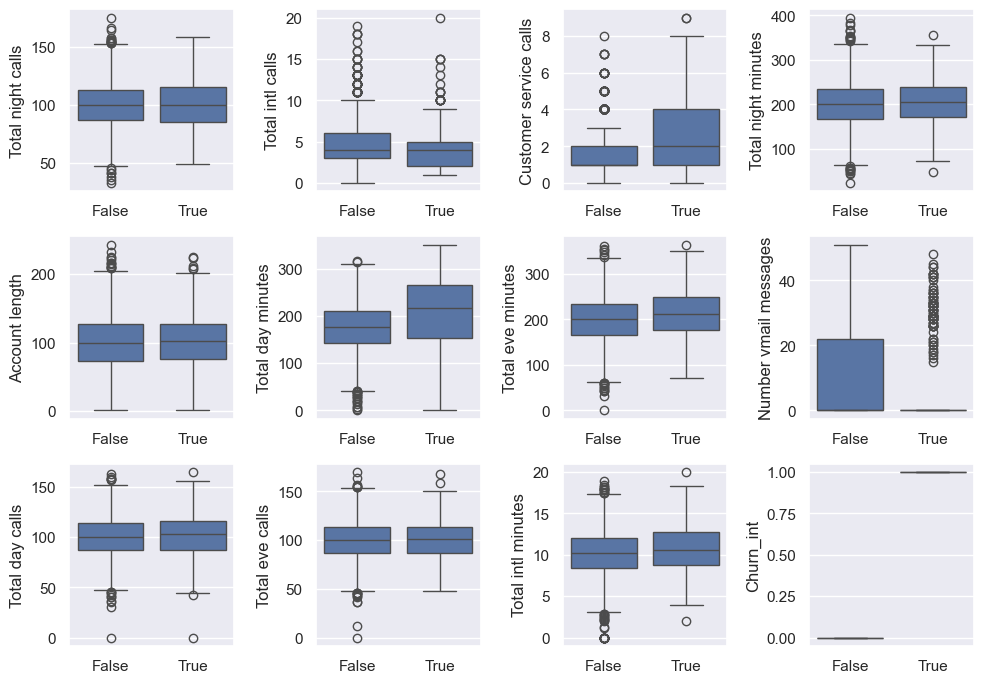

In [35]:
# Fazendo uma analise inicial os clientes que saíram  pende para superior a direita
# Clientes que tendem ficar mais tempo notelefone de manhã e a noite
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

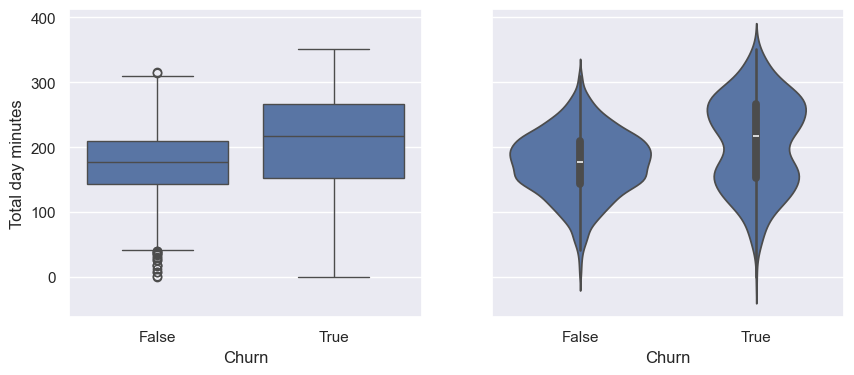

In [40]:
# Parando para analisar, nota-se que possuímos 3 variaveis bem discrepante que são "Number vmail message", "Total day minutes"
# e "Customer service calls"
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

In [41]:
# é possivel analisar que os clientes que descontinua o serviço, são mais ativos em serviço de comunicação
# pode ser que seja interessante diminuit as chamadasx

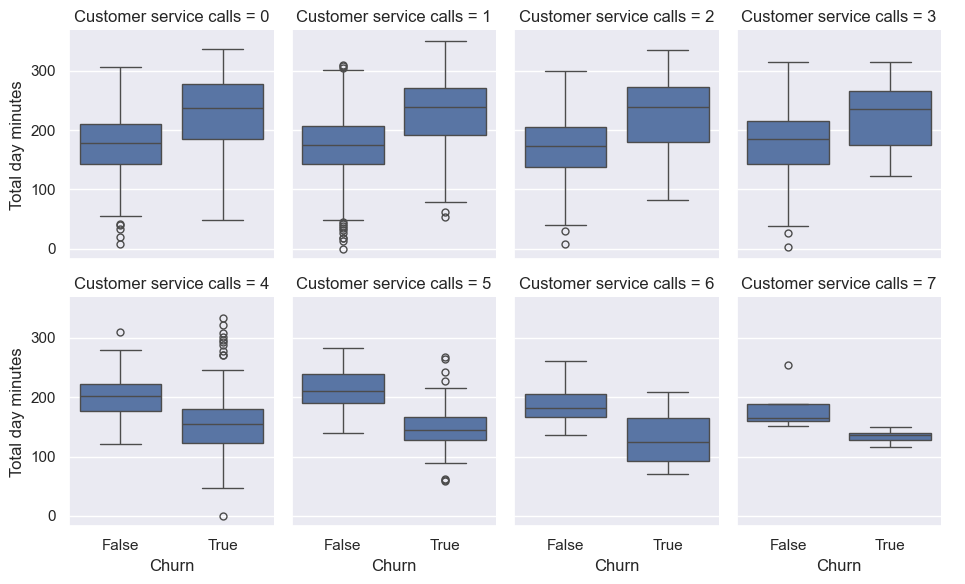

In [42]:
# Para analisar uma variável quantitativa em duas dimensões categóricas ao mesmo tempo, há uma função adequada para isso. 
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

In [ ]:
# conseguimos concluir que com 4 chamadas  o "Total day minutes" pode não ser cmais o principal fator para a rotatividade de clientes.
# Talvez, além do nosso palpite anterior sobre as tarifas, haja clientes que estajam insatifestos por algum outro motivo 

## Categorico X Categorico

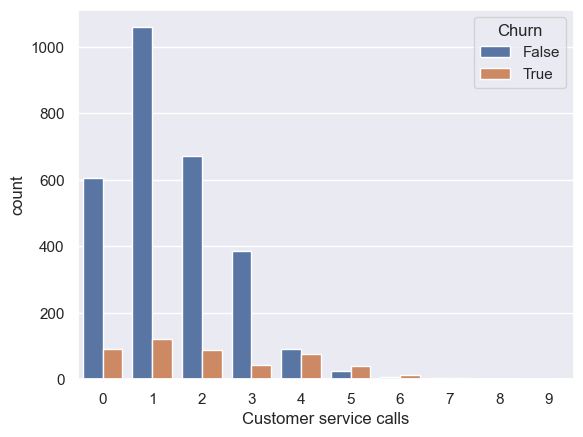

In [43]:
# Variavel Customer service calls, tem poucos valores únicos, portanto pode ser cnonsiderada numérico ou ordinal. 
# Vamos analisar a distribuição dos números de chamadas para o serviço de atendimento ao cliente
sns.countplot(x="Customer service calls", hue="Churn", data=df);

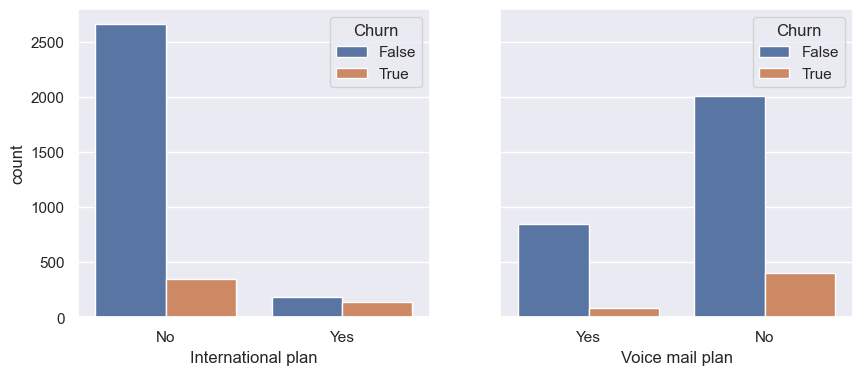

In [44]:
# Observação: Taxa de rotatividade aumenta significamente após 4 ou mais chamadas para o atendimento ao cliente

# Vamos analisar a relação entre Churn e os recursos binários, planos internacional e plano de correios de voz
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);


In [45]:
# Plano internacional está habilitado a taxa de rotatividade é maior (recurso forte)
# não foi observado a mesma coisa para correio de voz

In [47]:
# Tabela de contingencia
# além de usar meio gráficos, podemos usar a famosa tabulação cruzada. Mostra bem a distribuição de frequencia multivariada de variaveis
# categoricas em forma de tabela
pd.crosstab(df['State'], df["Churn"]).T


State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [5]:
df.groupby(["State"])["Churn"].agg(["mean"]).sort_values(by="mean", ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

## Redução de dimensionalidade

### T-SNE

In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [7]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [8]:
# vamos é necessario normalizar e iremos usar o StanderdScaler (é feito o descio padrão de cada dado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# construir a representação T-SNE
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

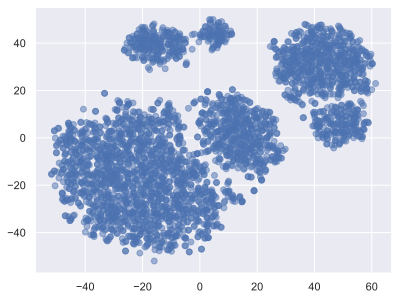

In [10]:
plt.scatter(tsne_repr[:,0], tsne_repr[:, 1], alpha=0.5)

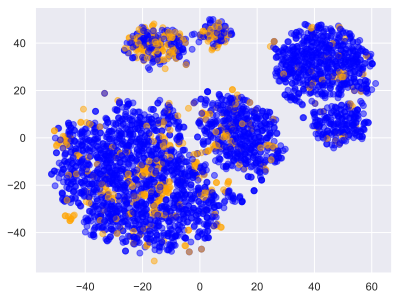

In [14]:
# agora vamos diferenciar o Churn
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

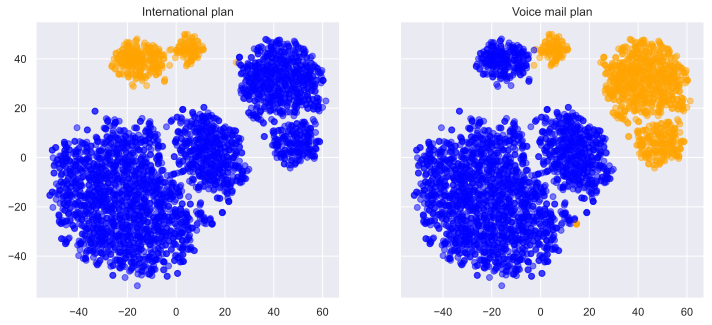

In [15]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);